In [22]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
#path to data
path = 'data/'
start_date = '2014-10-08'
end_date = '2024-08-27'

In [24]:
#portfolio to assess in the portfolio analysis
market = 'NASDAQ_COMP'
portfolio = ['AAPL', 'TSLA', 'GOOGL', 'ZI', 'AMGN', 'INTC', market]

In [26]:
df = pd.DataFrame(columns=['date'])

for ticker in portfolio:
    data = pd.read_csv(path+ticker+'.csv')
    print(data.shape)
    df = pd.merge(df, data[['date', 'close']], on='date', how='outer', suffixes=(ticker, ticker))

#rename column names with Ticker values
df.columns = ['date'] + [i for i in portfolio]


(11019, 6)
(3566, 6)
(5040, 6)
(1065, 6)
(10384, 6)
(13265, 6)
(2527, 6)


In [27]:
#convert dates to datetime
df['date'] = pd.to_datetime(df['date'])

#sort dates
df = df.sort_values(by='date')

# Reset the index
df.reset_index(drop=True, inplace=True)

#drop any rows with NaNs
#df = df.dropna()

#filter data from start and end dates
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [28]:
df

,date,AAPL,TSLA,GOOGL,ZI,AMGN,INTC,NASDAQ_COMP
10777,2014-10-08,22.5851,17.2853,29.1870,NaN,111.848,27.0889,4468.59
10778,2014-10-09,22.6330,17.1340,28.5405,NaN,109.853,26.5752,4378.34
10779,2014-10-10,22.5732,15.7940,27.7595,NaN,109.697,25.2222,4276.24
10780,2014-10-13,22.3638,14.9727,27.2375,NaN,106.628,24.8755,4213.66
10781,2014-10-14,22.1265,15.1373,27.4345,NaN,105.561,25.4069,4227.17
...,...,...,...,...,...,...,...,...
13271,2024-08-21,226.4000,223.2700,165.8500,9.69,329.150,21.4100,17918.99
13272,2024-08-22,224.5300,210.6600,163.8200,9.52,324.720,20.1200,17619.35
13273,2024-08-23,226.8400,220.3200,165.6200,9.72,328.800,20.5400,17877.79
13274,2024-08-26,227.2200,213.2350,166.1600,9.80,326.900,20.1400,17725.76


<Axes: >

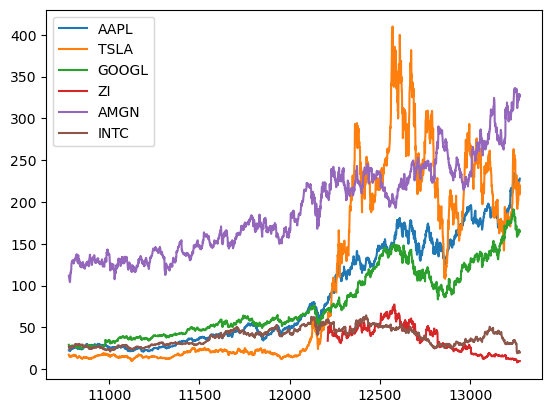

In [29]:
df[portfolio[:-1]].plot()

# Daily Rate of Returns

In [30]:
df_daily_ROR = pd.DataFrame()
df_daily_ROR[portfolio] = (df[portfolio].diff()/df[portfolio].shift(1))*100
df_daily_ROR['date'] = df['date']


<Axes: >

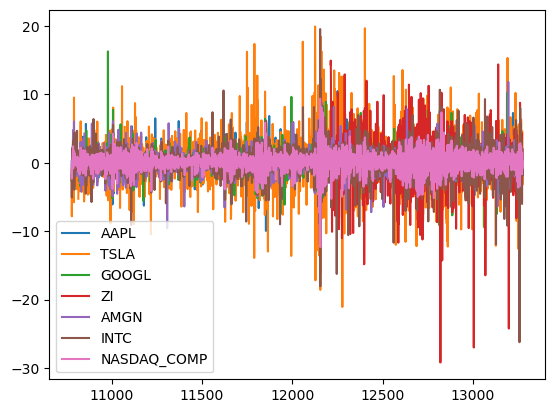

In [31]:
df_daily_ROR[portfolio].plot()

In [32]:
df

,date,AAPL,TSLA,GOOGL,ZI,AMGN,INTC,NASDAQ_COMP
10777,2014-10-08,22.5851,17.2853,29.1870,NaN,111.848,27.0889,4468.59
10778,2014-10-09,22.6330,17.1340,28.5405,NaN,109.853,26.5752,4378.34
10779,2014-10-10,22.5732,15.7940,27.7595,NaN,109.697,25.2222,4276.24
10780,2014-10-13,22.3638,14.9727,27.2375,NaN,106.628,24.8755,4213.66
10781,2014-10-14,22.1265,15.1373,27.4345,NaN,105.561,25.4069,4227.17
...,...,...,...,...,...,...,...,...
13271,2024-08-21,226.4000,223.2700,165.8500,9.69,329.150,21.4100,17918.99
13272,2024-08-22,224.5300,210.6600,163.8200,9.52,324.720,20.1200,17619.35
13273,2024-08-23,226.8400,220.3200,165.6200,9.72,328.800,20.5400,17877.79
13274,2024-08-26,227.2200,213.2350,166.1600,9.80,326.900,20.1400,17725.76


In [33]:
df_daily_ROR

,AAPL,TSLA,GOOGL,ZI,AMGN,INTC,NASDAQ_COMP,date
10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-08
10778,0.212087,-0.875310,-2.215027,NaN,-1.783671,-1.896349,-2.019653,2014-10-09
10779,-0.264216,-7.820707,-2.736462,NaN,-0.142008,-5.091213,-2.331934,2014-10-10
10780,-0.927649,-5.200076,-1.880437,NaN,-2.797706,-1.374583,-1.463435,2014-10-13
10781,-1.061090,1.099334,0.723268,NaN,-1.000675,2.136238,0.320624,2014-10-14
...,...,...,...,...,...,...,...,...
13271,-0.048563,0.984654,-0.804450,-0.205973,0.182621,2.000953,0.572770,2024-08-21
13272,-0.825972,-5.647870,-1.223998,-1.754386,-1.345891,-6.025222,-1.672192,2024-08-22
13273,1.028816,4.585588,1.098767,2.100840,1.256467,2.087475,1.466796,2024-08-23
13274,0.167519,-3.215777,0.326048,0.823045,-0.577859,-1.947420,-0.850385,2024-08-26


# Mean and Covariance of Returns

In [34]:
mean_daily_returns, covar_daily_returns = pd.DataFrame(), pd.DataFrame()

In [35]:
mean_daily_returns = df_daily_ROR.mean(axis=0)
covar_daily_returns[portfolio] = df_daily_ROR[portfolio].cov()

In [36]:
mean_daily_returns

AAPL                                0.107902
TSLA                                0.160526
GOOGL                               0.084493
ZI                                 -0.038076
AMGN                                0.054093
INTC                                0.011555
NASDAQ_COMP                         0.064258
date           2019-09-09 18:52:52.148859392
dtype: object

In [37]:
covar_daily_returns

#the diagonal represents the variance of market returns or the volatility. This is a measure of how much the stock price varies w.r.t. the stock average daily returns

,AAPL,TSLA,GOOGL,ZI,AMGN,INTC,NASDAQ_COMP
AAPL,3.242827,2.748514,1.955287,2.757297,1.101872,1.984290,1.939645
TSLA,2.748514,12.613681,2.328382,5.145016,1.079256,2.548144,2.635140
GOOGL,1.955287,2.328382,3.194411,2.955090,1.006498,1.826025,1.875324
ZI,2.757297,5.145016,2.955090,15.312661,0.428525,2.709010,2.919380
AMGN,1.101872,1.079256,1.006498,0.428525,2.458170,1.233372,1.066559
INTC,1.984290,2.548144,1.826025,2.709010,1.233372,4.872780,1.918770
NASDAQ_COMP,1.939645,2.635140,1.875324,2.919380,1.066559,1.918770,1.796255


# Financial Elasticity (Beta)

In [38]:
beta = pd.Series(covar_daily_returns[market])/df_daily_ROR[market].var(axis=0)

In [39]:
beta

AAPL           1.079827
TSLA           1.467019
GOOGL          1.044019
ZI             1.625259
AMGN           0.593768
INTC           1.068206
NASDAQ_COMP    1.000000
Name: NASDAQ_COMP, dtype: float64

# Portfolio Risk & Returns

In [140]:
#investment weights (must sum to 1)
w = data =[.1, .2, .1, .2, 0.2, 0.2]


In [100]:
stocks = portfolio[:-1]

n = len(stocks) #number of stocks
trading_days = 251 #number of trading days

In [101]:
beta[:n].to_list()

[1.0798270609622505,
 1.4670185868149597,
 1.0440186918958183,
 1.625259288170552,
 0.593767966775642,
 1.068205771568767]

In [102]:
mean_daily_returns[:n].to_list()

[0.10790209648277078,
 0.16052627415523618,
 0.08449301923111063,
 -0.0380761922009901,
 0.05409333613728726,
 0.011555276596729733]

In [141]:
import numpy as np

portfolio_daily_return = np.matmul(w, mean_daily_returns[:n].to_list()).sum()

In [142]:
annualized_portfolio_return = portfolio_daily_return * trading_days
annualized_portfolio_return

14.271671877769231

In [143]:
portfolio_risk = np.sqrt(np.matmul(np.matmul(w, covar_daily_returns.iloc[:-1, :-1].to_numpy()), np.transpose(w)))


In [144]:
annualized_portfolio_risk = np.sqrt(trading_days*np.matmul(np.matmul(w, covar_daily_returns.iloc[:-1, :-1].to_numpy()), np.transpose(w)))
annualized_portfolio_risk

28.488982810252892